In [ ]:
!pip install --upgrade pandas-datareader
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 6.4 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 8.2 MB/s 
     |████████████████████████████████| 1.6 MB 43.4 MB/s 


In [ ]:
! pip install pycryptodome pycryptodomex
! pip uninstall --yes pandas-datareader
! pip install git+https://github.com/raphi6/pandas-datareader.git@ea66d6b981554f9d0262038aef2106dda7138316

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 6.7 MB/s 
     |████████████████████████████████| 2.3 MB 52.6 MB/s 
Found existing installation: pandas-datareader 0.10.0
Uninstalling pandas-datareader-0.10.0:
  Successfully uninstalled pandas-datareader-0.10.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/raphi6/pandas-datareader.git (to revision ea66d6b981554f9d0262038aef2106dda7138316) to /tmp/pip-req-build-yq0nugwh
  Running command git clone -q https://github.com/raphi6/pandas-datareader.git /tmp/pip-req-build-yq0nugwh
  Running command git rev-parse -q --verify 'sha^ea66d6b981554f9d0262038aef2106dda7138316'
  Running command git fetch -q https://github.com/raphi6/pandas-datareader.git ea66d6b981554f9d0262038aef2106dda7138316
  Running command git checkout -q ea66d6b981554f9d0262038aef2106dda7138316
  Cre

In [ ]:
from pandas_datareader import data
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
import math
from keras.models import Sequential
from keras.layers import Dense,LSTM
from tensorflow import keras
import keras_tuner as kt

In [ ]:
#Getting stock quote

import pandas
from pandas_datareader import data as pdr
df = web.DataReader ('AAPL', data_source='yahoo', start='2005-01-01', end='2015-12-31')
df
 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,1.162679,1.117857,1.156786,1.130179,6.919920e+08,0.963385
2005-01-04,1.169107,1.124464,1.139107,1.141786,1.096810e+09,0.973279
2005-01-05,1.165179,1.143750,1.151071,1.151786,6.804336e+08,0.981803
2005-01-06,1.159107,1.130893,1.154821,1.152679,7.055552e+08,0.982564
2005-01-07,1.243393,1.156250,1.160714,1.236607,2.227450e+09,1.054106
...,...,...,...,...,...,...
2015-12-24,27.250000,26.987499,27.250000,27.007500,5.428160e+07,24.724873
2015-12-28,26.922501,26.545000,26.897499,26.705000,1.068168e+08,24.447935
2015-12-29,27.357500,26.715000,26.740000,27.184999,1.237248e+08,24.887367


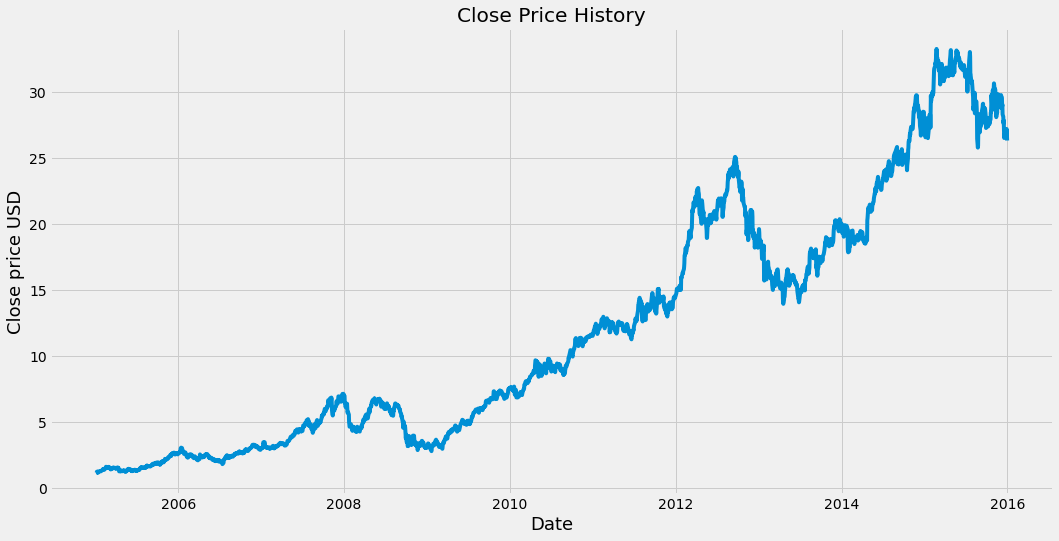

In [ ]:
# Visualizing closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD', fontsize=18)
plt.show()

In [ ]:
#Creating a New Dataframe with only the 'Close Column'
data = df.filter(['Close'])
#Converting dataframe to a numpy array
dataset = data.values
#Get number of rows to train the model on
training_data_len = math.ceil (len(dataset)*0.6 )
training_data_len

1662

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(len(scaled_data))
scaled_data


2769


array([[0.00000000e+00],
       [3.61363524e-04],
       [6.72697466e-04],
       ...,
       [8.11175768e-01],
       [8.00123416e-01],
       [7.84089722e-01]])

In [ ]:
# creating training and testing datasets
train_data = scaled_data[0:training_data_len , :]

x_train = []
y_train = []
# We take 60 last values and we make a prediction on the 61th value then we use the 61 values to predict the 62th after 59th iteration we will only use predicted value to predict future value
for i in range(60, 360):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()


[array([0.        , 0.00036136, 0.0006727 , 0.0007005 , 0.00331347,
       0.00315226, 0.00070604, 0.00120642, 0.00361926, 0.00384161,
       0.0040918 , 0.00366372, 0.00398617, 0.00400285, 0.00415295,
       0.00487014, 0.00498135, 0.00519816, 0.00594312, 0.00756651,
       0.00791676, 0.00908427, 0.00807243, 0.00864506, 0.00870067,
       0.00979034, 0.00858946, 0.00837822, 0.00996269, 0.01186404,
       0.01396555, 0.01492178, 0.01363198, 0.01307604, 0.01223098,
       0.01386549, 0.01425465, 0.014288  , 0.01469386, 0.01429357,
       0.01387103, 0.01128029, 0.01241445, 0.01234773, 0.00987929,
       0.00856723, 0.00910095, 0.00959018, 0.00964579, 0.0103574 ,
       0.01060202, 0.01179178, 0.01258123, 0.01340403, 0.01243668,
       0.01212534, 0.01206974, 0.01210312, 0.0112358 , 0.01240331])]
[0.011146854426946455]



In [ ]:
# creating training and testing datasets
train_data = scaled_data[0:training_data_len , :]

x_train = []
y_train = []
x_valid = []
y_valid = []
i=60
while(i<training_data_len):
  if(i%100==0 and i!=0):
    for j in range(i,i+50):
      x_valid.append(train_data[j-60:j,0])
      y_valid.append(train_data[j,0])
    i+=50
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  i+=1


In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape
# x contain 1602 arrays of 1 line and 60 columns 

(802, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
#model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False, input_shape= (x_train.shape[1], 1)))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model 
model.compile(optimizer='adam', loss='mean_absolute_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


1359/1359 [==============================] - 23s 15ms/step - loss: 0.0232


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[(training_data_len - 60)+100:2215 , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len+100:2215, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
valid_data = scaled_data[2215: , :]
#append the data remaining to x_valid and y_valid
for i in range(60, len(valid_data)):
  x_valid.append(valid_data[i-60:i, 0])
  y_valid.append(valid_data[i, 0])

In [ ]:
len(valid_data)

554

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)
y_test = np.array(y_test)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1 ))
y_valid = np.reshape(y_valid, (y_valid.shape[0], 1 ))
print(y_valid.shape)

(1294, 1)


In [ ]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

15/15 [==============================] - 2s 9ms/step


In [ ]:
x_train.shape

(1062, 60, 1)

In [ ]:
print(predictions.shape)
print(x_test.shape)
print(y_test.shape)


(453, 1)
(453, 60, 1)
(453, 1)


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

0.14289409224823874

<ipython-input-103-06decd4a75db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


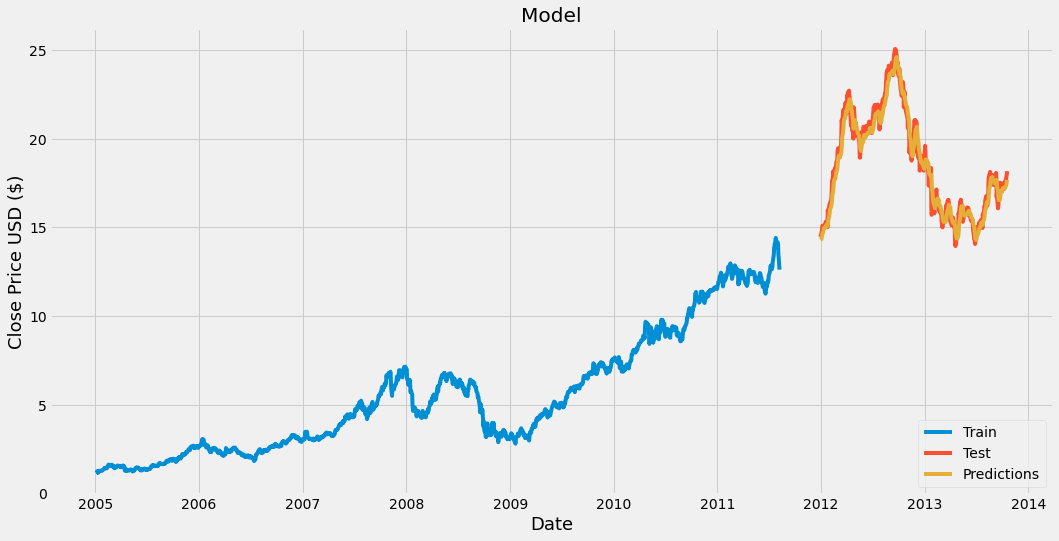

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len+100:2215]
valid['Predictions']= predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()
#The space is in order to avoid overfitting we let 3 months between train and test and test and valid

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2011-12-30,14.464286,14.300961
2012-01-03,14.686786,14.346013
2012-01-04,14.765714,14.433295
2012-01-05,14.929643,14.519073
2012-01-06,15.085714,14.624688
...,...,...
2013-10-14,17.715714,17.337139
2013-10-15,17.809999,17.413958
2013-10-16,17.896786,17.497196


In [ ]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start ='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array 
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 25ms/step
[[62.2989]]


In [ ]:
#get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote['Close'])

Date
2012-01-03    14.686786
2012-01-04    14.765714
2012-01-05    14.929643
2012-01-06    15.085714
2012-01-09    15.061786
                ...    
2019-12-11    67.692497
2019-12-12    67.864998
2019-12-13    68.787498
2019-12-16    69.964996
2019-12-17    70.102501
Name: Close, Length: 2003, dtype: float64


In [ ]:
def model_builder1(hp):
  model = keras.Sequential()
  hp_units_1 = hp.Int('units_1', min_value=15, max_value=150, step=10)
  model.add(LSTM(hp_units_1, return_sequences=True, input_shape= (x_train.shape[1], 1)))

  # Tune the activation function 
  hp_activation = hp.Choice('activation', values=["relu", "sigmoid", "tanh"])
  

  # Tune the number of units in the each LSTM layer
  hp_units_2 = hp.Int('units_2', min_value=15, max_value=150, step=10)
  model.add(LSTM(hp_units_2, return_sequences=False))

  #Add layers for not so brutal change in units in layers
  model.add(tf.keras.layers.Dense(units=hp_units_2/4, activation=hp_activation))
  model.add(tf.keras.layers.Dense(units=hp_units_2/8, activation=hp_activation))

  # Add dense output layer
  model.add(tf.keras.layers.Dense(1, activation='linear'))

  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                loss='mean_squared_error',
                metrics=['MeanSquaredError','MeanAbsoluteError'])

  return model

In [ ]:
tuner1 = kt.BayesianOptimization(model_builder1, objective='mean_squared_error', max_trials=1, overwrite=True)

In [ ]:
tuner1.search(x_train, y_train, epochs=4)
#Our previous mean squared error without optimization of parameters was 3e-04

Trial 1 Complete [00h 00m 26s]
mean_squared_error: 0.00013371276145335287

Best mean_squared_error So Far: 0.00013371276145335287
Total elapsed time: 00h 00m 26s


In [ ]:
# Get the optimal hyperparameters
best_hps=tuner1.get_best_hyperparameters(num_trials=1)[0]
print(f"""
#The hyperparameter search is complete. The optimal number of neurons in the first LSTM layer is {best_hps.get('units_1')}. 
The optimal number of units for the second LSTM layer is {best_hps.get('units_2')}.
The optimal activation function for the 3rd and 4th densely-connected layers is  {best_hps.get('activation')}.
""")



The hyperparameter search is complete. The optimal number of neurons in the first LSTM layer is 135. 
The optimal number of units for the second LSTM layer is 115.
The optimal activation function for the 3rd and 4th densely-connected layers is  relu.



In [ ]:
x_valid.shape

(994, 60, 1)

In [ ]:
y_valid.shape

(994,)

In [ ]:
model1 = tuner1.hypermodel.build(best_hps)
model1.fit(x_train, y_train, epochs=4)

Epoch 1/4
26/26 [==============================] - 10s 245ms/step - loss: 0.2513 - mean_squared_error: 0.2513 - mean_absolute_error: 0.1775
Epoch 2/4
26/26 [==============================] - 4s 170ms/step - loss: 3.8229e-04 - mean_squared_error: 3.8229e-04 - mean_absolute_error: 0.0147
Epoch 3/4
26/26 [==============================] - 4s 166ms/step - loss: 1.6601e-04 - mean_squared_error: 1.6601e-04 - mean_absolute_error: 0.0102
Epoch 4/4
15/15 [==============================] - 2s 61ms/step - loss: 337.2041 - mean_squared_error: 337.2041 - mean_absolute_error: 18.1472
[test loss]: [337.2041015625, 337.2041015625, 18.147239685058594]


In [ ]:
# Evaluate the test performance of the tuned model
eval_result = model1.evaluate(x_test, y_test)
print("[test loss]:", eval_result)
# Evaluate the test performance of the tuned model
eval_result = model1.evaluate(x_valid, y_valid)
print("[test loss]:", eval_result)

15/15 [==============================] - 1s 85ms/step - loss: 337.2041 - mean_squared_error: 337.2041 - mean_absolute_error: 18.1472
[test loss]: [337.2041015625, 337.2041015625, 18.147239685058594]
41/41 [==============================] - 3s 61ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0427
[test loss]: [0.003982354421168566, 0.003982354421168566, 0.04271229729056358]


In [ ]:
x_valid.shape
x_test.shape

(453, 60, 1)

In [ ]:
#Get the models predicted price values
predictions1 = model1.predict(x_test)
predictions1 = scaler.inverse_transform(predictions1)

15/15 [==============================] - 2s 68ms/step


In [ ]:
#Get the models predicted price values
predictions2 = model1.predict(x_valid)
predictions2 = scaler.inverse_transform(predictions2)

41/41 [==============================] - 4s 65ms/step


<ipython-input-117-091ca78072d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid1['Predictions']= predictions1


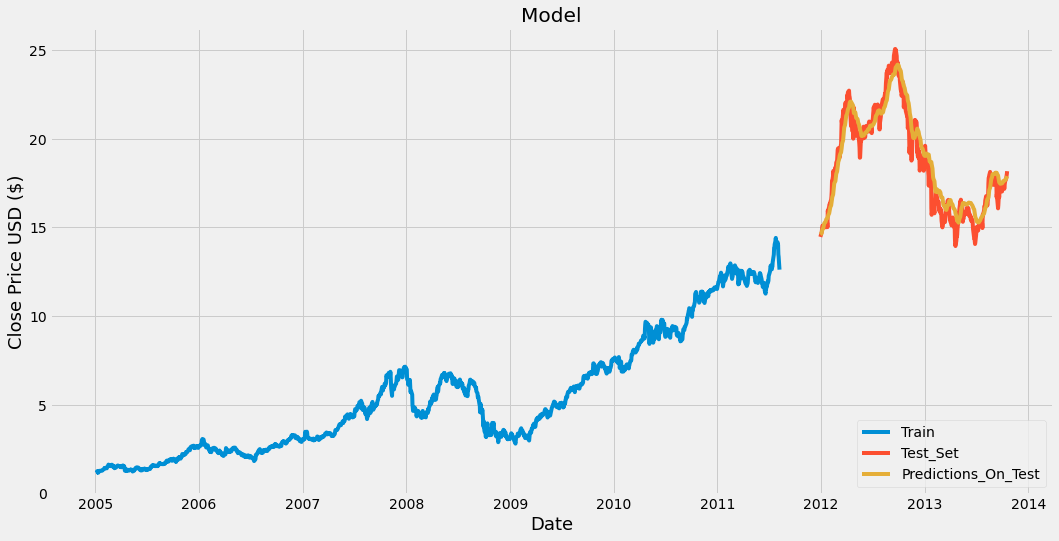

In [ ]:
#Plot the data
train = data[:training_data_len]
valid1 = data[training_data_len+100:2215]
valid1['Predictions']= predictions1
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid1[['Close', 'Predictions']])
plt.legend(['Train', 'Test_Set', 'Predictions_On_Test'], loc='lower right')
plt.show()

In [ ]:
valid1

,Close,Predictions
Date,,
2011-12-30,14.464286,14.593424
2012-01-03,14.686786,14.657726
2012-01-04,14.765714,14.730496
2012-01-05,14.929643,14.803327
2012-01-06,15.085714,14.872244
...,...,...
2013-10-14,17.715714,17.731415
2013-10-15,17.809999,17.775890
2013-10-16,17.896786,17.813700
